---
title: "ABC.2: RStudio projects and Anaconda+Python"
author: "Marie Sønderstrup-Jensen, Samuele Soraggi"
image: ./2024-06-27-ABC2/Anaconda.png
date: 2024-06-27
categories: [R, RStudio, Anaconda, Python, environments]
description: "Things worth remembering from the ABC.2"
eval: true
---

# Slides

Conferences in the second half of 2024, introduction to Integrated Development Environments and Virtual Environments.

&nbsp;

 <p align="center">
  <a href="https://abc.au.dk/documentation/slides/20240627-ABC.2.zip" style="background-color: #4266A1; color: #FFFFFF; padding: 30px 20px; text-decoration: none; border-radius: 5px;">
    Download Slides
  </a>
</p>

&nbsp;

The following tutorials show how to create a package environment and do some basic analysis in both R and python.

# R Tutorial

In this tutorial we show how to create a project in RStudio and to manage all the necessary packages within a package environment created with `renv`. Using a package environment ensures you always use the same packages at specific versions inside the project, making the analysis reproducible.

Using project management in RStudio offers several advantages in terms of organisation and collaboration (to mention a few). Each project **has its own working directory, Rstudio settings for the workspace, command history, and files with code**. [Read more here](https://support.posit.co/hc/en-us/articles/200526207-Using-RStudio-Projects)

Another advantage is that a project facilitates collaboration by maintaining a consistent environment across different team members (and remember that it's good practice to use the same version of R throughout a project, check your version using the `R.version()`-function)

## Project creation and management in RStudio

**1.** Open RStudioo, go to the menu and select `File` --> `New Project...`

**2.** Choose `New Directory` --> `New Project` (similarly you can create a project in an existing folder). Note that there is a third version including version control: here you can also control the history of all changes in the project files using version control tools (such as Git), but we are not talking about this for now.

![](./2024-06-27-ABC2/newProject.png){width=400}

**3.** Name your project and select the directory where you want to save it. Click on *use renv for this project*. Finally click `Create Project`

**4.** The project is now established. You can see some files are automatically created into the project directory.

:::{.callout-note}

When you want to open your project the next time, you can either:
- Open the project by double-clicking on the file in Windows Explorer/OSX Finder (e.g. MyProject.Rproj)
- Open RStudio, go to the menu and select `File` --> `Open Project` and browser to find and select the project that you want to open
- Open RStudio, go to the menu, select `File` --> `Recent Projects`, and select the project from the list of most recently opened projects

Some of the things making it nice to work in projects in RStudio are that when a project is opened:

- A new R session (process) is started
- The .RData file (saved data) in the project's main directory is loaded
- The .Rhistory file (command history) in the project's main directory is loaded
- The current working directory is set to the project directory
- Packages in the environment are loaded
- And other settings are restored to where they were the last time the project was closed

:::

### Project structure

**A clean and organised project structure is super important**. To ensure this, a good practice is to create subfolders like `Data`, `Scripts`, `Output`, and `Docs` within your project directory. You can do all this in the RStudio browser (bottom-right corner).

![](./2024-06-27-ABC2/projStruct.png){width=400}

## Using the `renv` package to manage a project's environment

The `renv` package allows you to create isolated and reproducible environments for your R projects, ensuring that the exact package versions and dependencies are used, ultimately facilitating reproducibility and collaboration. For an extended description, [read more here](https://rstudio.github.io/renv/articles/renv.html). Dependencies are packages on which others rely on to work.

Key features:

- Each project can have its own set of R packages and versions
- Ensures that the same package versions are used each time the project is run
- Manages dependencies by automatically tracking the packages used in your project and their versions
- Ensures the same environment setup when sharing projects with collaborators

### tracking installed packages with renv

You do not need much to track all your packages. Simply create your files with R code and save them inside your project folder. While you code, you will necessarily install some packages which you need to create your program.

When you are done, run in the Rstudio console the program `renv::snapshot()` - this will update the file `renv.lock` with a list of all installed packages and dependencies (open the file to see how it looks like). All the packages are installed inside the `renv` folder and will be loaded from there.

Note that `renv` will track only packages that are used in your files with code - other packages which are installed but not used will not be tracked. Pretty smart!

**1.** Now, try to install `dplyr` and `ggplot2` using

```{.r}
install.packages(c("dplyr", "ggplot2"))
```

in the RStudio console.

**2.** Snapshot the environment by running 

```{.r}
renv::snapshot()
```

Have a look at the file `renv.lock` to see how it looks like. It should not show any package beyond `renv`: the file is updated only with packages used in the scripts you have in the project folder, so we will have to run the snapshot at the end of the tutorial where we use the packages!

:::{.callout-tip title="Sharing projects"}

When sharing your project, include the `renv.lock` and `renv` directory in the project folder. You can also include just the file `renv.lock`. Other users can use `renv::activate()` to activate the environment, and also `renv::restore()` if they need to install the packages (in case the folder `renv` is not provided).

Note that if you provide the folder `renv`, this must be used in the same operating system. It might not be possible to use the environment folder create, for example, in Linux, on a windows or mac computer.

:::

## Kickstart dplyr analysis

The `dplyr` package is part of the [tidyverse](https://www.tidyverse.org/), a set of packages all based on consistent and intuitive syntax/grammar for data manipulation, where the fundamental data structure is the data frame. `dplyr` is one of the most popular packages for data manipulation.

We already install the package in our environment and it is ready to use. You can use the following commands in the Console, or create an R script or an R markdown document.

Create a small dataset with gene expressions and some patient meta data:


In [2]:
# Load dplyr
library(dplyr)

# Create the dataframe
data <- data.frame(
  SampleID = c("S1", "S2", "S3", "S4", "S5"),
  Gene1 = c(5.2, 6.3, 4.9, 7.2, 5.8),
  Gene2 = c(3.8, 2.7, 3.5, 4.1, 3.9),
  Gene3 = c(7.1, 8.5, 6.8, 9.2, 7.3),
  Age = c(45, 52, 37, 50, 43),
  Treatment = c("A", "B", "A", "B", "A"),
  Response = c("Responder", "Non-Responder", "Responder", "Non-Responder", "Responder")
)


data

SampleID,Gene1,Gene2,Gene3,Age,Treatment,Response
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
S1,5.2,3.8,7.1,45,A,Responder
S2,6.3,2.7,8.5,52,B,Non-Responder
S3,4.9,3.5,6.8,37,A,Responder
S4,7.2,4.1,9.2,50,B,Non-Responder
S5,5.8,3.9,7.3,43,A,Responder


You can apply many commands very intuitively with `dplyr`. For example, to select only the gene expressions:

In [4]:
selected_data <- select(data, Gene1, Gene2, Gene3)

selected_data

Gene1,Gene2,Gene3
<dbl>,<dbl>,<dbl>
5.2,3.8,7.1
6.3,2.7,8.5
4.9,3.5,6.8
7.2,4.1,9.2
5.8,3.9,7.3


You can establish any filter based on the columns or combination of them. Filtering only on age of at least 50yo and rate of Gene1 and Gene2 larger than 2 is as below 

In [6]:
filtered_data <- filter(data, Age>50 & Gene1/Gene2>2)

filtered_data

SampleID,Gene1,Gene2,Gene3,Age,Treatment,Response
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
S2,6.3,2.7,8.5,52,B,Non-Responder


Adding new columns as a combination of others is also immediate 

In [7]:
mutated_data <- mutate(data, GeneTotal = Gene1 + Gene2 + Gene3)

mutated_data

SampleID,Gene1,Gene2,Gene3,Age,Treatment,Response,GeneTotal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
S1,5.2,3.8,7.1,45,A,Responder,16.1
S2,6.3,2.7,8.5,52,B,Non-Responder,17.5
S3,4.9,3.5,6.8,37,A,Responder,15.2
S4,7.2,4.1,9.2,50,B,Non-Responder,20.5
S5,5.8,3.9,7.3,43,A,Responder,17.0


Now we introduce the pipe symbol `%>%`. This combines with the dplyr functions such that subsequent operations between pipes reflect the way we enunciate them orally. For example: The dataframe **data** must be **grouped by** treatment and for each group **summarise** the Gene1 by its average. **Arrange** the result by the average of Gene1 in descending order.

:::{.callout-note title="dataframes and tibbles"}

Note how the output is no longer a dataframe, but a *tibble*. A tibble is a more "modern" version of the dataframe which is used in the tidyverse packages. You cannot really notice much difference when using them. To ensure you are using a tibble , you can always define a dataframe and transform it into a tibble using the command `as_tibble`. [Read more about tibbles at this link](https://tibble.tidyverse.org/).

:::

In [27]:
grouped_data <- data %>% 
                group_by(Treatment) %>% 
                summarise(avgGene1 = mean(Gene1)) %>%
                arrange( desc(avgGene1) )

grouped_data

Treatment,avgGene1
<chr>,<dbl>
B,6.75
A,5.30


To save your table in the `Output` folder as csv file:

In [30]:
write.csv(grouped_data, "Output/grouped.csv")

Now, if you ran all the commands in your console, create a new R script (File -> New -> R Script) and paste all the code used until now, then save it. If you instead used a Script or Markdown, save it. Move the script/markdown file into the `Code` folder, so you keep the files organized! Now run again

```{.r}
renv::snapshot()
```

You should be requested for permission to write some packages into `renv.lock`. Accept and look into the file, which not should be different and including new package names.

:::{.callout-note title="wrap up"}

Now you know how to manage a project in RStudio and the packages you need. `dplyr` and the other packages pivoting around `tidyverse` have a plethora of useful functionalities. A good place to start from is to use a table you need for your own work, and try out various things you can do. Some good resources for training are available as links below:

- [A chapter of **R for data science** from the data carpentry](https://uw-madison-datascience.github.io/R-health-lesson/03-dplyr/index.html). Go through it and look at other chapters as well, they are very instructive!

- [A cheatsheet for all `dplyr` manipulation and for other important tidyverse packages + Rstudio.](https://rstudio.github.io/cheatsheets/)  Keep some at your desk!

:::

# Python Tutorial

We will first install `Anaconda`, which allows you to create environments (isolated group of packages to run a project and ensure reproducibility), and run softwares to code interactively (we will use one called jupyterlab).

## Install Anaconda and create an environment

**1.** Download Anaconda from [the download page](https://www.anaconda.com/download). Uso also the `Sign In` button of the webpage to create an account: this will enable you to use an AI-chat showing up while you code, and which can help you doing a lot of things.

:::{.callout-note}

This guide has been made with Windows, and works similarly with MacOS. For Linux, you will download a file with `.sh` extension, which you can execute in the command line with `bash installer.sh`.

:::

**2.** Once Anaconda is installed, open **Anaconda Navigator**. Log into Anaconda Cloud from the software, and eventually update Anaconda Navigator if asked.

**3.** Your initial window would look similarly as below. What you can see is a suite of softwares. Some of those are installed and they are found in the anaconda **environment** called `base (root)`, as shown in the red circle. It is good advice not to modify the base environment, because Anaconda itself is installed into it!

![](./2024-06-27-ABC2/landing.png)

**4.** We create a new environment with only few needed packages for our tutorial. Click on `Environments` on the toolbar (red circle). You can see the base (root) environment and a long list of packages it contains. Click on `Create` (blue circle).

![](./2024-06-27-ABC2/envlist.png)

**5.** In the appearing window choose a name for the environment and select `Python`. Then click on `Create`. It takes a bit of time to create the environment.

![](./2024-06-27-ABC2/options.png)

**6.** Select the environment. It will load a few packages (just Python and its essential dependencies), but we want to install new ones. Open the filtering menu (green circle above) and choose `All` to view all existing packages. Select the following packages: `pandas`, `numpy`, `jupyterlab`, `anaconda-toolbox`, `seaborn` and click `Apply`. A list of dependencies will be shown, and you have to accept that to continue. Wait for the installations to go through.

**7.** Now select the environment again. There are much more packages installed and ready to use. Click on `Home` in the toolbar: you will see the softwares installed in your environment (choose `Installed Application` from the dropdown menu to see only the installed ones).

:::{.callout-note title="wrap up"}

You can create various environments to keep specific versions of packages constant in separate data science projects. This ensures a high degree of reproducibility in your projects.

An environment can include the softwares needed to code (RStudio, jupyterLab are the most famous, but also others can be installed).

We will use the created environment to run some basic commands in python.

:::

## Python basics

Here we look at the python basics: variables, arrays and dataframes. We will immediately work with two packages: `numpy` and `pandas`, which make the use of arrays and dataframes very flexible.

### JupyterLab

Launch jupyterlab from the Anaconda Home, using the environment ABC2. You should be able to see Jupyterlab opened in your internet browser. It will look similar to the one below: it has a file browser, can show the opened files on different tabs, and has a coding window where the opened file is shown. When you first open jupyterlab you will instead see a Launcher, which gives you a choice for all the available things to do, usually Notebooks, Console, or Other, with related available languages.

![](./2024-06-27-ABC2/jupyterLab.png)

You do not create projects in JupyterLab, you simply create folders instead. 

- Use the browser to create a folder wherever you prefere, and organize it into subfolders: `Code`, `Output`, `Data`, `Scripts`. You can use the small button above the browser to create a folder, or simply the right-click options. 

- Again with a right click, create a notebook inside the `Code` folder

- When asked to choose a kernel, select `python 3`. A kernel includes the programming language and its packages as we installed them into the environment using Anaconda.

    ![](./2024-06-27-ABC2/kernel.png){fig-align="center", width=300px}

A notebook looks like this:

 ![](./2024-06-27-ABC2/notebook.png){width=800px}

 The gray area is a code cell, where you can write code. Select the left border out of a cell to

 - transform it into a Markdown cell where you can write text: key M of your keyboard
 - add a cell below: key B
 - run the cell and add one below: keys Shift+Enter



:::{.callout-tip}

A notebook looks a lot like a text file. When you open it, it will show all results and images from your code! You can share it to anyone without the need to run the code again for the recipient, if it is needed to simply show some results.

The webpage you are reading now has been created with a notebook!

:::

Let's turn things into practice now. Transform the first cell into markdown (key M) and write a title with 

```
 ## ABC2 is cool
```

and press Shift+Enter. You will get a new cell below, and the text will be formatted from Markdown. 

Now we write some code in the new cell and press Shift+Enter to execute:

In [1]:
import numpy as np
import pandas as pd

print("Hello ABC")
x = np.arange(1,10)
y = x**2
print("x")
print(x)
print("y")
print(y)

Hello ABC
x
[1 2 3 4 5 6 7 8 9]
y
[ 1  4  9 16 25 36 49 64 81]


Things should look as below:

 ![](./2024-06-27-ABC2/run.png){width=800px}

 The little number on the left shows how many code steps you have been running so far. The code imports relevant libraries and shortens their name with `np` and `pd`, which makes coding easier and compact. Then we use the library `np` to define an array of numbers from 1 to 10, and we square this array assigning it to `y`. Finally we print the two arrays.

All variables are assigned with the `=` symbol and you can do all arithmetic operations:



In [2]:
print(2+3)
print(9*2)
print(5**2)

5
18
25


### Pandas dataframes

we procees looking into a small dataframe. Let's create one using the `pandas` library

In [3]:
# Create the dataframe
data = pd.DataFrame({
    'SampleID': ['S1', 'S2', 'S3', 'S4', 'S5'],
    'Gene1': [5.2, 6.3, 4.9, 7.2, 5.8],
    'Gene2': [3.8, 2.7, 3.5, 4.1, 3.9],
    'Gene3': [7.1, 8.5, 6.8, 9.2, 7.3],
    'Age': [45, 52, 37, 50, 43],
    'Treatment': ['A', 'B', 'A', 'B', 'A'],
    'Response': ['Responder', 'Non-Responder', 'Responder', 'Non-Responder', 'Responder']
})

# View the dataframe
data

,SampleID,Gene1,Gene2,Gene3,Age,Treatment,Response
0,S1,5.2,3.8,7.1,45,A,Responder
1,S2,6.3,2.7,8.5,52,B,Non-Responder
2,S3,4.9,3.5,6.8,37,A,Responder
3,S4,7.2,4.1,9.2,50,B,Non-Responder
4,S5,5.8,3.9,7.3,43,A,Responder


You can plot variables from the dataframe with the package `seaborn`. For example

<Axes: xlabel='Gene1', ylabel='Gene2'>

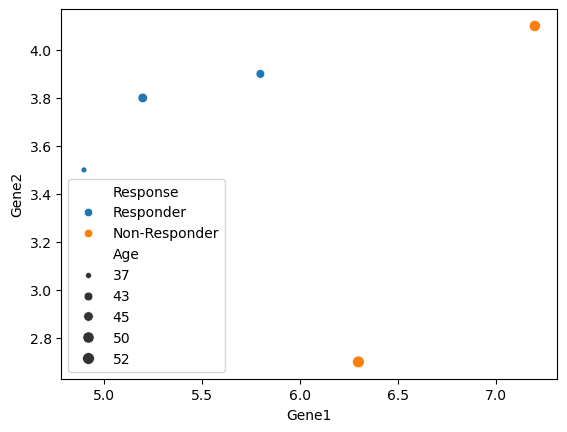

In [8]:
import seaborn as sns

sns.scatterplot(data=data,
                x="Gene1",
                y="Gene2",
                hue="Response",
                size="Age"
               )

In the command above we used some options beyond `x` and `y`. Can you see what they match in the plot?

:::{.callout-tip}

The [`seaborn` package webpage](https://seaborn.pydata.org/) has great examples for any kind of plot you desire!

:::

There are lots of summary statistics already implemented in `python`. Below we calculate mean, median and standard deviation for the column `Gene1` of the data frame and then we print them. 

In [11]:
x = data.Gene1
meanG1 = np.mean(x)
medianG1 = np.median(x)
sdG1 = np.std(x)

print("mean, median and sd:")
[meanG1, medianG1, sdG1]

mean, median and sd:


[np.float64(5.88), np.float64(5.8), np.float64(0.8182909018191513)]

This was neat! Can you try to calculate the cumulative sum of the difference between Gene1 and Gene2?

:::{.callout-tip collapse="true" title="Answer"}

The answer is

```{.python}
x = data.Gene1 - data.Gene2
csum = np.cumsum(x)
print("cumulative sum of Gene1 - Gene2:")
print(csum)
```

:::

### Functions

Although `python` and the packages you can find have almost everything you will need, sometimes you might need to define your own function. The syntax to do it is very easy: you define a function name, which then you will be able to use it. Below, there is a function taking an argument (`arg1`) and multiplying it by 5. The output needs to be explicit through the `return()` function.

In [17]:
def myFunction(arg1):
    res = arg1 * 5
    return(res)

Such a function works if the argument is a number, but also if it is an array!

In [20]:
print("with a number only")
print( myFunction(5) )
print("with an array")
print( myFunction(data.Gene1) )

with a number only
25
with an array
0    26.0
1    31.5
2    24.5
3    36.0
4    29.0
Name: Gene1, dtype: float64


Try to make a function that takes three vectors, plots the first against the sum of the second and third, and returns the sum of all three vectors. Use the plot command we applied previously for help.

:::{.callout-tip collapse="true" title="Answer"}


The answer is 

```{.python}
def simpleSumPlot(arg1, arg2, arg3):
    arg23 = arg2 + arg3
    arg123 = arg1 + arg2 + arg3

    #plotting
    fig = sns.scatterplot(x = arg1, 
                    y = arg2)
    fig.set_title("Plot with my own function")
    fig

    return(arg123)
```

Now you can try this on vectors **of the same length**. We can use the ones in our data frame!

```{.python}

simpleSumPlot(arg1 = data.Gene1,
             arg2 = data.Gene2,
             arg3 = data.Gene3)

```

:::


### Read and write files

Save a dataframe with the command `.to_csv`

In [28]:
data.to_csv('../Ouput/data.csv')

And read it again using

In [29]:
data2 = pd.read_csv('../Ouput/data.csv')

In [30]:
data2

,Unnamed: 0,SampleID,Gene1,Gene2,Gene3,Age,Treatment,Response
0,0,S1,5.2,3.8,7.1,45,A,Responder
1,1,S2,6.3,2.7,8.5,52,B,Non-Responder
2,2,S3,4.9,3.5,6.8,37,A,Responder
3,3,S4,7.2,4.1,9.2,50,B,Non-Responder
4,4,S5,5.8,3.9,7.3,43,A,Responder


:::{.callout-note title="wrap up"}

You learned how to use jupyterlab notebooks and how to do basic operations and plots with python.

:::